##Ví dụ 1

In [12]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(10)
means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 100
X0 = np.random.multivariate_normal(means[0], cov, N) # class 1
X1 = np.random.multivariate_normal(means[1], cov, N) # class -1
X = np.concatenate((X0.T, X1.T), axis = 1) # all data
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1) # labels

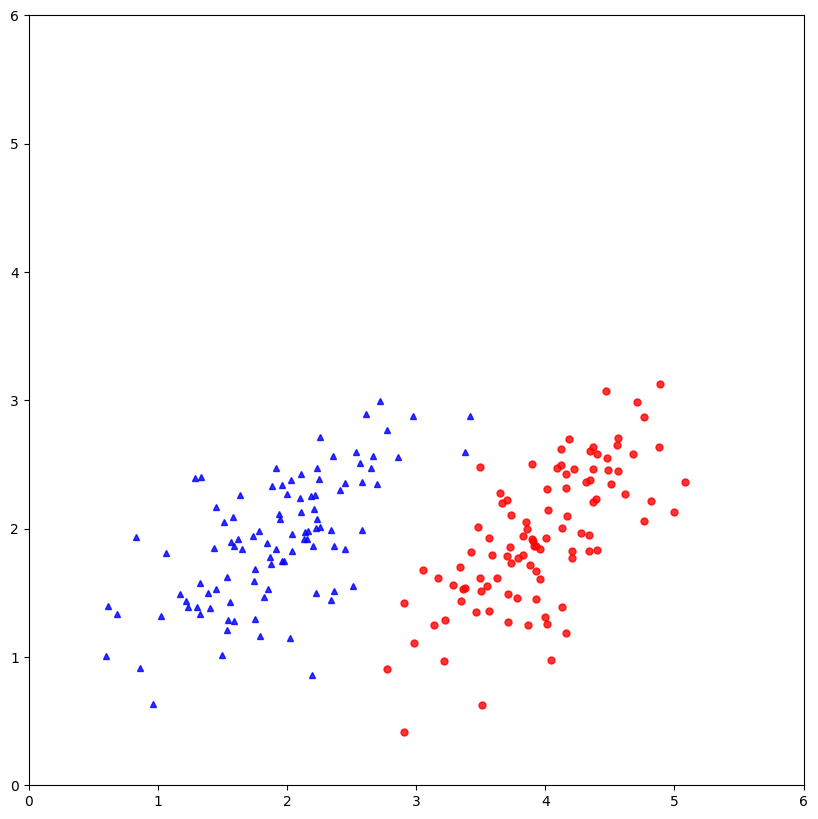

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
ani = plt.cla()
#plot points
ani = plt.plot(X0.T[0, :], X0.T[1, :], 'b^', markersize = 5, alpha = .8)
ani = plt.plot(X1.T[0, :], X1.T[1, :], 'ro', markersize = 5, alpha = .8)
ani = plt.axis([0 , 6, 0, 6])
plt.show()

In [14]:
#!pip install cvxopt
from cvxopt import matrix, solvers

In [15]:
# build P ~ K
V = np.concatenate((X0.T, -X1.T), axis = 1)
P = matrix(V.T.dot(V)) # P ~ K in slide see definition of V, K near eq (8)
q = matrix(-np.ones((2*N, 1))) # all-one vector
# build A, b, G, h
G = matrix(-np.eye(2*N)) # for all lambda_n >= 0! note that we solve -g(lambda) ->
min
h = matrix(np.zeros((2*N, 1)))
A = matrix(y) # the equality constrain is actually y^T lambda = 0
b = matrix(np.zeros((1, 1)))
solvers.options['show_progress'] = False
sol = solvers.qp(P, q, G, h, A, b)
l = np.array(sol['x']) # lambda
print('lambda = ')
print(l.T)

lambda = 
[[6.43830372e-10 4.72988123e-10 6.96301261e-10 5.79332567e-10
  5.85394978e-10 5.88997480e-10 4.89184241e-10 5.67664894e-10
  4.93959294e-10 8.11159682e-10 7.35998382e+01 5.84752419e-10
  6.33981206e-10 5.70452608e-10 5.33265241e-10 6.21992621e-10
  6.30547706e-10 6.42898737e-10 6.23309373e-10 7.19237900e-10
  6.37162151e-10 5.62750933e-10 5.43352984e-10 5.34317125e-10
  6.12473191e-10 5.54489279e-10 5.15178968e-10 6.11949009e-10
  7.11337568e-10 6.01640553e-10 6.16174828e-10 7.08582794e-10
  6.28907978e-10 9.47883549e-10 5.60470453e-10 5.73546044e-10
  5.40206464e-10 5.84839273e-10 4.52413498e-10 5.71685467e-10
  6.69868839e-10 4.47707836e-10 3.99526097e-10 5.50379371e-10
  8.79639914e-10 6.28698683e-10 6.73190935e-10 6.03403938e-10
  5.36740042e-10 1.22567795e-09 8.50987129e-10 4.93131967e-10
  6.05327442e-10 5.32588255e-10 7.14356409e-10 6.36992251e-10
  7.63436068e-10 5.89166800e-10 5.36104164e-10 9.45023473e-10
  6.67949637e-10 6.12129203e-10 6.46493582e-10 6.24525894e-1

In [16]:
epsilon = 1e-6 # just a small number, greater than 1e-9, to filter values of lambda
S = np.where(l > epsilon)[0]
VS = V[:, S]
XS = X[:, S]
yS = y[:, S]
lS = l[S]
# calculate w and b
w = VS.dot(lS)
w0 = np.mean(yS.T - w.T.dot(XS))
print('W = ', w.T)
print('W0 = ', w0)

W =  [[-10.10601344   6.8886009 ]]
W0 =  17.24141785932256


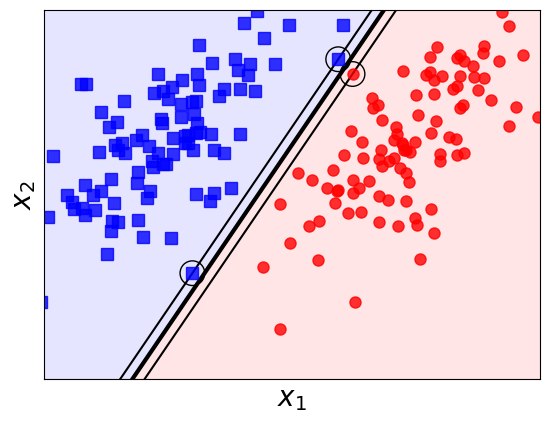

In [17]:
from matplotlib.backends.backend_pdf import PdfPages
with PdfPages('D:\\svm4hardmargin.pdf') as pdf:
    # draw
    # plot points
    fig, ax = plt.subplots()
    x1 = np.arange(-10, 10, 0.1)
    y1 = -w[0, 0]/w[1, 0]*x1 - w0/w[1, 0]
    y2 = -w[0, 0]/w[1, 0]*x1 - (w0-1)/w[1, 0]
    y3 = -w[0, 0]/w[1, 0]*x1 - (w0+1)/w[1, 0]
    plt.plot(x1, y1, 'k', linewidth = 3)
    plt.plot(x1, y2, 'k')
    plt.plot(x1, y3, 'k')
    y4 = 10*x1
    plt.plot(x1, y1, 'k')
    plt.fill_between(x1, y1, color='red', alpha=0.1)
    plt.fill_between(x1, y1, y4, color = 'blue', alpha = 0.1)
    plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = .8)
    plt.axis('equal')
    plt.ylim(0, 3)
    plt.xlim(2, 4)
    # hide tikcs
    cur_axes = plt.gca()
    cur_axes.axes.get_xaxis().set_ticks([])
    cur_axes.axes.get_yaxis().set_ticks([])
    # add circles around support vectors
    for m in S:
        circle = plt.Circle((X[0, m], X[1, m] ), 0.1, color='k', fill = False)
        ax.add_artist(circle)

    plt.xlabel('$x_1$', fontsize = 20)
    plt.ylabel('$x_2$', fontsize = 20)
    # plt.savefig('svm4.png', bbox_inches='tight', dpi = 300)
    # pdf.savefig()
    plt.show()

In [18]:
from sklearn.svm import SVC
# Copy and put code for generate data here
y1 = y.reshape((2*N,))
X1 = X.T # each sample is one row
clf = SVC(kernel = 'linear', C = 1e5) # just a big number
# if C is small, method will be “SoftMagin SVM”,
# if C is large enough, method is near to hard margin
clf.fit(X1, y1)
w = clf.coef_
w0 = clf.intercept_
print('w = ', w)
print('W0 = ', w0)

w =  [[-10.10242378   6.88613861]]
W0 =  [17.23542499]


In [19]:
from sklearn import datasets
cancer_data = datasets.load_breast_cancer()
# show to test record 5th
print(cancer_data.data[5])
print(cancer_data.data.shape)
#target set
print(cancer_data.target)
from sklearn.model_selection import train_test_split
cancer_data = datasets.load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer_data.data,
cancer_data.target, test_size=0.3,
random_state=109)

[1.245e+01 1.570e+01 8.257e+01 4.771e+02 1.278e-01 1.700e-01 1.578e-01
 8.089e-02 2.087e-01 7.613e-02 3.345e-01 8.902e-01 2.217e+00 2.719e+01
 7.510e-03 3.345e-02 3.672e-02 1.137e-02 2.165e-02 5.082e-03 1.547e+01
 2.375e+01 1.034e+02 7.416e+02 1.791e-01 5.249e-01 5.355e-01 1.741e-01
 3.985e-01 1.244e-01]
(569, 30)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 

####Bài tập thực hành 1

w (sklearn) = [-1.84378438  0.68941307]
w0 (sklearn) = 4.219509793781817
Accuracy (sklearn): 0.8550
Confusion Matrix (sklearn):
[[85 15]
 [14 86]]


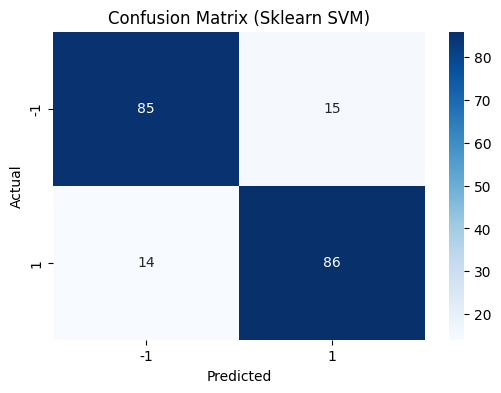

Accuracy (manual prediction with sklearn weights): 0.8550
Confusion Matrix (manual prediction with sklearn weights):
[[85 15]
 [14 86]]

w (custom) = [[-38.90253482  29.05177598]]
w0 (custom) = 67.19103860703494
Accuracy (custom): 1.0000
Confusion Matrix (custom):
[[100   0]
 [  0 100]]


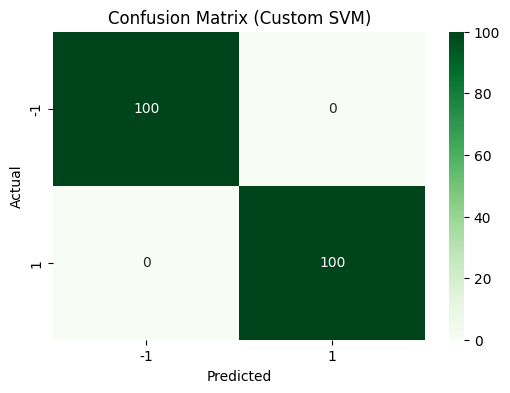

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Regenerate the data from Ví dụ 1
np.random.seed(10)
means = [[2, 2], [4, 2]]
cov = [[1, .2], [.2, 1]] # Adjusted covariance to be more like the example's visual spread
N = 100
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)

# Prepare data for sklearn
X_sklearn = np.vstack((X0, X1))
y_sklearn = np.array([1]*N + [-1]*N) # Using 1 and -1 as often used in SVM examples

# Train SVM using sklearn (approximating hard margin)
clf = SVC(kernel='linear', C=1e5) # Use a large C for hard margin [cite: 16]
clf.fit(X_sklearn, y_sklearn)

# Get weights
w_sklearn = clf.coef_[0]
w0_sklearn = clf.intercept_[0]

print(f"w (sklearn) = {w_sklearn}")
print(f"w0 (sklearn) = {w0_sklearn}")

# Predictions
y_pred_sklearn = clf.predict(X_sklearn)

# Accuracy
accuracy_sklearn = accuracy_score(y_sklearn, y_pred_sklearn)
print(f"Accuracy (sklearn): {accuracy_sklearn:.4f}")

# Confusion Matrix
cm_sklearn = confusion_matrix(y_sklearn, y_pred_sklearn)
print("Confusion Matrix (sklearn):")
print(cm_sklearn)

# Plotting the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_sklearn, annot=True, fmt='d', cmap='Blues', xticklabels=[-1, 1], yticklabels=[-1, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Sklearn SVM)')
plt.show()

# Predictions using the formula: y_pred = sign(X.dot(w) + w0)
# Note: X_sklearn needs to be used here.
manual_predictions = np.sign(X_sklearn.dot(w_sklearn) + w0_sklearn)

# Adjust -0 to -1 for consistency if sign function outputs 0 for any sample
manual_predictions[manual_predictions == 0] = -1 # Or 1, depending on convention for margin cases

manual_accuracy = accuracy_score(y_sklearn, manual_predictions)
print(f"Accuracy (manual prediction with sklearn weights): {manual_accuracy:.4f}")

manual_cm = confusion_matrix(y_sklearn, manual_predictions)
print("Confusion Matrix (manual prediction with sklearn weights):")
print(manual_cm)




from cvxopt import matrix, solvers
# Data generation as in the PDF
means_pdf = [[2, 2], [4, 2]]
cov_pdf = [[.3, .2], [.2, .3]] # As per PDF source code text [Incorrectly typed as 13,2], [2,3] in image]
N_pdf = 100
X0_pdf = np.random.multivariate_normal(means_pdf[0], cov_pdf, N_pdf)
X1_pdf = np.random.multivariate_normal(means_pdf[1], cov_pdf, N_pdf)
X_pdf = np.concatenate((X0_pdf.T, X1_pdf.T), axis=1) # Shape (2, 200)
y_pdf = np.concatenate((np.ones((1, N_pdf)), -1*np.ones((1, N_pdf))), axis=1) # Shape (1, 200)

V = X_pdf * y_pdf # Element-wise multiplication for P matrix construction
P_cvx = matrix(V.T.dot(V))
q_cvx = matrix(-np.ones((2*N_pdf, 1)))
G_cvx = matrix(-np.eye(2*N_pdf))
h_cvx = matrix(np.zeros((2*N_pdf, 1)))
A_cvx = matrix(y_pdf) # y_pdf should be (1, 2*N)
b_cvx = matrix(np.zeros((1,1)))

solvers.options['show_progress'] = False
sol = solvers.qp(P_cvx, q_cvx, G_cvx, h_cvx, A_cvx, b_cvx)
lambda_cvx = np.array(sol['x'])

epsilon = 1e-6
S = np.where(lambda_cvx > epsilon)[0]
VS_cvx = V[:,S]
XS_cvx = X_pdf[:,S]
yS_cvx = y_pdf[:,S] # This needs to be y_pdf.reshape(-1,1)[S] or similar if y_pdf is (1, 2N)
lambdaS_cvx = lambda_cvx[S]

w_custom = VS_cvx.dot(lambdaS_cvx) # w = sum(lambda_n * y_n * x_n)

w0_custom_vals = yS_cvx - w_custom.T @ XS_cvx # This will be (Ns, 1) - (1, Ns) with broadcasting

w0_custom = np.mean(y_pdf.reshape(1,-1)[0,S] - w_custom.T @ X_pdf[:,S])


print(f"\nw (custom) = {w_custom.T}")
print(f"w0 (custom) = {w0_custom}")

# Predictions with custom SVM weights
# X_pdf is (d, N), w_custom is (d,1)
pred_custom_vals = w_custom.T @ X_pdf + w0_custom # Results in (1,N)
y_pred_custom = np.sign(pred_custom_vals).flatten()
y_actual_custom = y_pdf.flatten()

# Ensure labels are compatible (+1, -1)
y_pred_custom[y_pred_custom == 0] = -1 # Handle cases on the decision boundary

accuracy_custom = accuracy_score(y_actual_custom, y_pred_custom)
print(f"Accuracy (custom): {accuracy_custom:.4f}")

cm_custom = confusion_matrix(y_actual_custom, y_pred_custom)
print("Confusion Matrix (custom):")
print(cm_custom)

# Plotting the confusion matrix for custom SVM
plt.figure(figsize=(6,4))
sns.heatmap(cm_custom, annot=True, fmt='d', cmap='Greens', xticklabels=[-1, 1], yticklabels=[-1, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Custom SVM)')
plt.show()

####Bài tập thực hành 2

--- Sklearn SVC ---
w (sklearn) = [ 14.9030683   -5.63787293   3.48238297  -4.71121077  -3.53539732
  21.43360606  -3.97594805 -15.24607859   4.02855053  -3.3100591
 -11.11854636   1.44771734   3.01577039 -11.24757865   3.44446357
  -8.62727606  10.33229229 -18.51758141  11.38194253  10.68556101
  -1.03453974  -5.28469378  -2.34995023 -23.34099344  -2.1490278
  -1.56609974  -7.3374262    5.05593482 -15.42598793   0.79306359]
w0 (sklearn) = -0.5173257793248968
Accuracy on breast cancer dataset (sklearn): 0.9591
Confusion Matrix (sklearn):
[[ 61   2]
 [  5 103]]


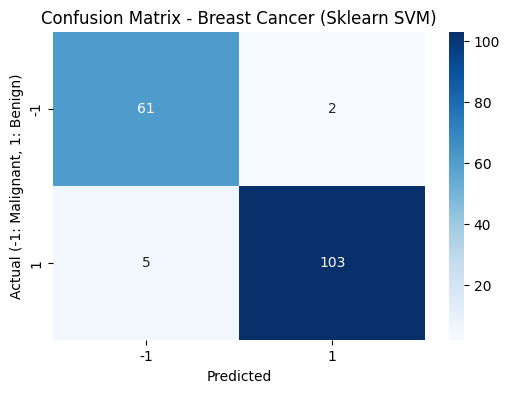


--- Custom CVXOPT SVM (Conceptual) ---
Note: Full execution of custom CVXOPT requires careful data reshaping and is computationally intensive.
w (custom) = [[ 14.90713263  -5.63633232   3.48031028  -4.72406048  -3.53508553
   21.43824352  -3.9768661  -15.24563795   4.02730795  -3.31525698
  -11.11379369   1.44917424   3.01656742 -11.25464855   3.44443106
   -8.62149972  10.33001014 -18.51642814  11.38108203  10.67915946
   -1.00722701  -5.2859563   -2.35711879 -23.35560238  -2.14932934
   -1.57713313  -7.33263732   5.05860407 -15.4243618    0.79967847]]
w0 (custom) = -0.5219876222546437
Accuracy on breast cancer dataset (custom): 0.9591
Confusion Matrix (custom):
[[ 61   2]
 [  5 103]]


In [21]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
# For the custom solver (if we were to fully implement it for this dataset)
# from cvxopt import matrix, solvers

# 1. Load the dataset [cite: 19]
cancer_data = datasets.load_breast_cancer()
X_cancer = cancer_data.data
y_cancer = cancer_data.target # 0 for malignant, 1 for benign. We'll map to 1 and -1.

# Convert labels: Malignant (0) to -1, Benign (1) to 1 for SVM
y_cancer_svm = np.array([-1 if label == 0 else 1 for label in y_cancer])

# 2. Split data into training and testing sets [cite: 19]
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer_svm, test_size=0.3, random_state=109)

# 3. Feature Scaling
# SVMs are sensitive to feature scaling.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Using sklearn.svm.SVC (Hard Margin Approximation) ---
print("--- Sklearn SVC ---")
# Use a large C for hard margin approximation [cite: 16]
clf_cancer = SVC(kernel='linear', C=1e5)
clf_cancer.fit(X_train_scaled, y_train)

# Predictions
y_pred_cancer = clf_cancer.predict(X_test_scaled)

# Weights and intercept
w_cancer_sklearn = clf_cancer.coef_[0]
w0_cancer_sklearn = clf_cancer.intercept_[0]
print(f"w (sklearn) = {w_cancer_sklearn}")
print(f"w0 (sklearn) = {w0_cancer_sklearn}")

# Accuracy
accuracy_cancer = accuracy_score(y_test, y_pred_cancer)
print(f"Accuracy on breast cancer dataset (sklearn): {accuracy_cancer:.4f}")

# Confusion Matrix
cm_cancer = confusion_matrix(y_test, y_pred_cancer)
print("Confusion Matrix (sklearn):")
print(cm_cancer) # Rows: Actual, Columns: Predicted. Labels based on unique values in y_test, y_pred_cancer

# Plotting the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_cancer, annot=True, fmt='d', cmap='Blues', xticklabels=clf_cancer.classes_, yticklabels=clf_cancer.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual (-1: Malignant, 1: Benign)')
plt.title('Confusion Matrix - Breast Cancer (Sklearn SVM)')
plt.show()


# --- Applying the custom CVXOPT-based SVM (Conceptual Outline) ---
# To apply the custom SVM from Ví dụ 1, we would need to:
# 1. Reshape X_train_scaled and y_train to match the (d, N) and (1, N) format if different.
X_train_cvx = X_train_scaled.T  # (30, num_samples_train)
y_train_cvx = y_train.reshape(1, -1) # (1, num_samples_train)
N_train_cancer = X_train_cvx.shape[1]

# 2. Construct V, P, q, G, h, A, b matrices using X_train_cvx and y_train_cvx.
V_cancer = X_train_cvx * y_train_cvx # Element-wise
P_cancer_cvx = matrix(V_cancer.T.dot(V_cancer))
q_cancer_cvx = matrix(-np.ones((N_train_cancer, 1)))
G_cancer_cvx = matrix(-np.eye(N_train_cancer))
h_cancer_cvx = matrix(np.zeros((N_train_cancer, 1)))
# A_cancer_cvx = matrix(y_train_cvx) # Original line
A_cancer_cvx = matrix(y_train_cvx, tc='d') # Specify data type as 'd'
b_cancer_cvx = matrix(np.zeros((1,1)))

# 3. Solve using solvers.qp
sol_cancer = solvers.qp(P_cancer_cvx, q_cancer_cvx, G_cancer_cvx, h_cancer_cvx, A_cancer_cvx, b_cancer_cvx)
lambda_cancer_cvx = np.array(sol_cancer['x'])

# 4. Extract support vectors and calculate w and w0
epsilon_cancer = 1e-6 # Threshold for lambda
S_cancer = np.where(lambda_cancer_cvx > epsilon_cancer)[0]
#    # ... and so on to calculate w_custom_cancer, w0_custom_cancer

#    # Ensure correct dimensions for VS, XS, yS, lambdaS
VS_cancer = V_cancer[:,S_cancer]
XS_cancer = X_train_cvx[:,S_cancer]
yS_cancer = y_train_cvx[:,S_cancer]
lambdaS_cancer = lambda_cancer_cvx[S_cancer]

w_custom_cancer = VS_cancer.dot(lambdaS_cancer)
w0_custom_cancer = np.mean(yS_cancer - w_custom_cancer.T @ XS_cancer)
#    # (Adjust mean calculation based on dimensions as discussed in Exercise 1)

print("\n--- Custom CVXOPT SVM (Conceptual) ---")
print("Note: Full execution of custom CVXOPT requires careful data reshaping and is computationally intensive.")
print(f"w (custom) = {w_custom_cancer.T}")
print(f"w0 (custom) = {w0_custom_cancer}")

  #  Predictions on X_test_scaled (needs to be X_test_scaled.T for (d,N) format)
pred_vals_custom_cancer = w_custom_cancer.T @ X_test_scaled.T + w0_custom_cancer
y_pred_custom_cancer = np.sign(pred_vals_custom_cancer).flatten()
y_pred_custom_cancer[y_pred_custom_cancer == 0] = -1 # or 1

accuracy_custom_cancer = accuracy_score(y_test, y_pred_custom_cancer)
print(f"Accuracy on breast cancer dataset (custom): {accuracy_custom_cancer:.4f}")

cm_custom_cancer = confusion_matrix(y_test, y_pred_custom_cancer)
print("Confusion Matrix (custom):")
print(cm_custom_cancer)


####Ví dụ 2

Unique mapped y_sonar values: [-1  1]
Shape of w (sonar_sklearn): (60,)
w0 (sonar_sklearn) = 0.4016469279403256
Accuracy on Sonar dataset (sklearn SVM): 0.7619
Confusion Matrix (sklearn SVM on Sonar):
[[24  5]
 [10 24]]


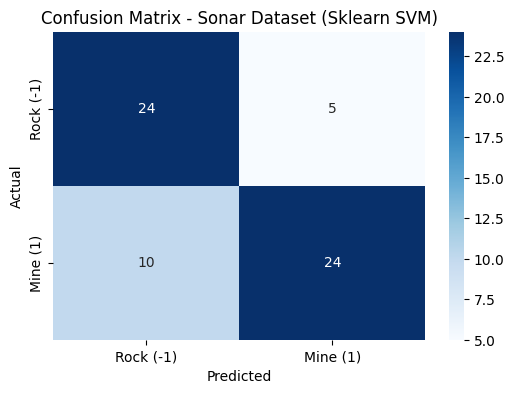

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

sonar_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
sonar_df = pd.read_csv(sonar_url, header=None)

# Separate features and target
X_sonar = sonar_df.iloc[:, :-1].values
y_sonar_labels = sonar_df.iloc[:, -1].values

# Encode labels: 'M' -> 1, 'R' -> -1
y_sonar = np.array([1 if label == 'M' else -1 for label in y_sonar_labels])
print(f"Unique mapped y_sonar values: {np.unique(y_sonar)}")

# Train-test split
X_train_sonar, X_test_sonar, y_train_sonar, y_test_sonar = train_test_split(
    X_sonar, y_sonar, test_size=0.3, random_state=42, stratify=y_sonar
)

# Feature scaling
scaler_sonar = StandardScaler()
X_train_sonar_scaled = scaler_sonar.fit_transform(X_train_sonar)
X_test_sonar_scaled = scaler_sonar.transform(X_test_sonar)

# Hard-margin SVM (C large)
clf_sonar = SVC(kernel='linear', C=1e5)
clf_sonar.fit(X_train_sonar_scaled, y_train_sonar)

# Predictions and evaluation
y_pred_sonar = clf_sonar.predict(X_test_sonar_scaled)
w_sonar_sklearn = clf_sonar.coef_[0]
w0_sonar_sklearn = clf_sonar.intercept_[0]

print(f"Shape of w (sonar_sklearn): {w_sonar_sklearn.shape}")
print(f"w0 (sonar_sklearn) = {w0_sonar_sklearn}")

accuracy_sonar = accuracy_score(y_test_sonar, y_pred_sonar)
print(f"Accuracy on Sonar dataset (sklearn SVM): {accuracy_sonar:.4f}")

cm_sonar = confusion_matrix(y_test_sonar, y_pred_sonar, labels=[-1, 1])
print("Confusion Matrix (sklearn SVM on Sonar):")
print(cm_sonar)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_sonar, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Rock (-1)', 'Mine (1)'],
            yticklabels=['Rock (-1)', 'Mine (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Sonar Dataset (Sklearn SVM)')
plt.show()
